In [1]:

from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET

xtraindir = 'Data\\train\\'
xtestdir = 'Data\\test\\'
xvaldir = 'Data\\valid\\'
ytraindir = 'Data\\train\\'
ytestdir = 'Data\\test\\'
yvaldir = 'Data\\valid\\'


In [2]:
def load_img(image_path):
    img = tf.keras.utils.load_img(image_path) # loads the image
    img = tf.keras.utils.img_to_array(img) # converts the image to numpy array
    return img

In [3]:
def extract_boxes(path):
    boxes = list()
    xvalues = list()
    for filename in os.listdir(path):
        fullname = os.path.join(path, filename)
        if not fullname.endswith('.xml'): continue
        tree = ET.parse(fullname)
        root = tree.getroot()
        test = root.find('object').find('name')
        #print(test.text)
        if not root.find('.//bndbox'):
            coors = [0, 0, 0, 0, 0]
            boxes.append(coors)
            xfilename = fullname.replace('.xml', '.jpg')
            xpixelvals = load_img(xfilename)
            xvalues.append(xpixelvals)
        else:
            # extract each bounding box
            for box in root.findall('.//bndbox'):
                xmin = int(box.find('xmin').text)
                ymin = int(box.find('ymin').text)
                xmax = int(box.find('xmax').text)
                ymax = int(box.find('ymax').text)
                if test.text == "disgusted":
                    coors = [1, xmin/640, ymin/640, xmax/640, ymax/640]
                elif test.text == "happy":
                    coors = [2, xmin/640, ymin/640, xmax/640, ymax/640]
                elif test.text == "neutral":
                    coors = [3, xmin/640, ymin/640, xmax/640, ymax/640]
                elif test.text == "sad":
                    coors = [4, xmin/640, ymin/640, xmax/640, ymax/640]
                boxes.append(coors)
                xfilename = fullname.replace('.xml', '.jpg')
                xpixelvals = load_img(xfilename)
                xvalues.append(xpixelvals)
    return boxes, xvalues

xtrain = []
ytrain = []
xval = []
yval = []
xtest = []
ytest = []

ytrain, xtrain = extract_boxes(ytraindir)
yval, xval = extract_boxes(yvaldir)
ytest, xtest = extract_boxes(ytestdir)

In [4]:
print(len(ytrain), len(xtrain), len(yval), len(xval), len(ytest), len(xtest))

381 381 37 37 17 17


In [5]:
xtrain_np_array = np.array(xtrain+xval)
ytrain_np_array = np.array(ytrain+yval)
xtest_np_array = np.array(xtest)
ytest_np_array = np.array(ytest)

In [6]:
#print(xtrain_np_array)
len(ytrain)

381

In [7]:
print(xtrain_np_array.shape)
print(ytrain_np_array.shape)
print(xtest_np_array.shape)
print(ytest_np_array.shape)
print(xtrain_np_array)
print(ytrain_np_array)

(418, 640, 640, 3)
(418, 5)
(17, 640, 640, 3)
(17, 5)
[[[[ 62.  28.  18.]
   [ 62.  28.  18.]
   [ 62.  28.  18.]
   ...
   [178. 169. 154.]
   [178. 169. 154.]
   [178. 169. 154.]]

  [[ 62.  28.  18.]
   [ 62.  28.  18.]
   [ 62.  28.  18.]
   ...
   [178. 169. 154.]
   [178. 169. 154.]
   [178. 169. 154.]]

  [[ 62.  28.  18.]
   [ 62.  28.  18.]
   [ 62.  28.  18.]
   ...
   [178. 169. 154.]
   [178. 169. 154.]
   [178. 169. 154.]]

  ...

  [[133.  89.  80.]
   [133.  89.  80.]
   [133.  89.  80.]
   ...
   [126.  91.  71.]
   [125.  90.  71.]
   [124.  89.  69.]]

  [[133.  89.  80.]
   [133.  89.  80.]
   [133.  89.  80.]
   ...
   [133.  97.  75.]
   [133.  96.  77.]
   [132.  96.  74.]]

  [[133.  89.  80.]
   [133.  89.  80.]
   [133.  89.  80.]
   ...
   [128.  92.  70.]
   [127.  91.  69.]
   [127.  91.  69.]]]


 [[[ 19.  19.  19.]
   [ 19.  19.  19.]
   [ 19.  19.  19.]
   ...
   [ 19.  19.  19.]
   [ 19.  19.  19.]
   [ 19.  19.  19.]]

  [[ 19.  19.  19.]
   [ 19.  19. 

In [8]:
ytrain_targets = ytrain_np_array[:,0]
ytest_targets = ytest_np_array[:,0]
ytrain_bounding_box = ytrain_np_array[:,1:5]
ytest_bounding_box = ytest_np_array[:,1:5]

In [9]:
xtrain_np_array

array([[[[ 62.,  28.,  18.],
         [ 62.,  28.,  18.],
         [ 62.,  28.,  18.],
         ...,
         [178., 169., 154.],
         [178., 169., 154.],
         [178., 169., 154.]],

        [[ 62.,  28.,  18.],
         [ 62.,  28.,  18.],
         [ 62.,  28.,  18.],
         ...,
         [178., 169., 154.],
         [178., 169., 154.],
         [178., 169., 154.]],

        [[ 62.,  28.,  18.],
         [ 62.,  28.,  18.],
         [ 62.,  28.,  18.],
         ...,
         [178., 169., 154.],
         [178., 169., 154.],
         [178., 169., 154.]],

        ...,

        [[133.,  89.,  80.],
         [133.,  89.,  80.],
         [133.,  89.,  80.],
         ...,
         [126.,  91.,  71.],
         [125.,  90.,  71.],
         [124.,  89.,  69.]],

        [[133.,  89.,  80.],
         [133.,  89.,  80.],
         [133.,  89.,  80.],
         ...,
         [133.,  97.,  75.],
         [133.,  96.,  77.],
         [132.,  96.,  74.]],

        [[133.,  89.,  80.],
       

In [10]:
import keras.backend as K

def calculate_iou(y_true, y_pred):
    # Extract bounding box coordinates 
    true_x, true_y, true_w, true_h= y_true[:, 0], y_true[:,1], y_true[:,2], y_true[:,3] 
    pred_x, pred_y, pred_w, pred_h = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2], y_pred[:, 3] 
    # Calculate intersection area
    true_area = true_w * true_h 
    pred_area = pred_w * pred_h
    x1 = K.maximum(true_x, pred_x) 
    y1 = K.maximum(true_y, pred_y) 
    x2 = K. minimum(true_x + true_w, pred_x + pred_w) 
    y2 = K.minimum(true_y + true_h, pred_y + pred_h) 
    intersection = K.maximum(x2 - x1, 0) * K. maximum (y2 - y1, 0) 
    union = true_area + pred_area - intersection + K.epsilon() 
    iou = intersection / union 
    iou_loss = 1 - iou 
    return iou_loss 

def IoULoss(y_true, y_pred): 
    return K.mean(calculate_iou(y_true, y_pred))

In [11]:
from functools import partial
import keras
from sklearn.model_selection import KFold
#from keras.optimizers import rmsprop_v2

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3)]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)
    
# Merge inputs and targets
inputs = np.concatenate((xtrain_np_array, xtest_np_array), axis=0)
targets = np.concatenate((ytrain_targets, ytest_targets), axis=0)
targetsBB=np.concatenate((ytrain_bounding_box,ytest_bounding_box),axis=0)
    
kfold = KFold(n_splits=5, shuffle=True)
c_loss_local=[]
c_acc_local=[]
bb_acc_local=[]
bb_loss_local=[]
c_acc_per_fold=[]
c_loss_per_fold=[]
bb_acc_per_fold=[]
bb_loss_per_fold=[]
overall_loss_per_fold=[]
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets, targetsBB):
    
    model2 = keras.models.Sequential()
    model2.add(DefaultConv2D(64, kernel_size=3, strides=2,
                            input_shape=[640, 640, 3]))
    model2.add(keras.layers.BatchNormalization())
    model2.add(keras.layers.Activation("relu"))
    #TRYING DROPOUT AFTER FIRST ACTIVATION
    model2.add(keras.layers.Dropout(0.1))
    model2.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
    prev_filters = 64
    for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
        strides = 1 if filters == prev_filters else 2
        model2.add(ResidualUnit(filters, strides=strides))
        prev_filters = filters

    model2.add(keras.layers.GlobalAvgPool2D())
    model2.add(keras.layers.Flatten())


    class_output = keras.layers.Dense(5, activation="sigmoid", name = "classification")(model2.output)
    loc_output = keras.layers.Dense(4, activation="sigmoid", name="boundingbox")(model2.output)
    optimizer = keras.optimizers.Adam()

    #learning rate scheduler
    def lr_schedule(epoch):
        return 0.0001
        # decreases the learning rate as training progresses
        # initial_lr = 0.0001
        # drop = 0.5
        # epochs_drop = 10
        # lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
        # return lr

    # Create a LearningRateScheduler callback
    lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

    model = keras.models.Model(inputs=model2.input, outputs=[class_output, loc_output])

    # explore loss functions
    model.compile(loss=["sparse_categorical_crossentropy", IoULoss],
                #0.7,0.3 --chris using 0.1,0.9
                loss_weights=[0.5, 0.5],
                optimizer=optimizer,
                metrics=["accuracy"])

    # Define other callbacks as needed
    checkpoint1 = keras.callbacks.ModelCheckpoint(
        '.\\',
        verbose=0,
        save_best_only=True,
        save_weights_only=True,
        mode="auto",
        save_freq="epoch"
    )
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(x= [inputs[train]], y = [targets[train], targetsBB[train]],
             batch_size=8,
             epochs=10,
             shuffle=True,
             verbose=1, callbacks=[lr_scheduler, checkpoint1])

    # Generate generalization metrics
    
    scores = model.evaluate([inputs[test]], [targets[test],targetsBB[test]], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}; {model.metrics_names[2]} of {scores[2]}')
    print(f'Score for fold {fold_no}: {model.metrics_names[3]} of {scores[3]*100}%; {model.metrics_names[4]} of {scores[4]*100}%')
    overall_loss_per_fold.append(scores[0])
    c_acc_per_fold.append(scores[3] * 100)
    c_loss_per_fold.append(scores[1])
    bb_acc_per_fold.append(scores[4]*100)
    bb_loss_per_fold.append(scores[2])
    c_acc_local.append(history.history['classification_accuracy'])
    c_loss_local.append(history.history['classification_loss'])
    bb_acc_local.append(history.history['boundingbox_accuracy'])
    bb_loss_local.append(history.history['boundingbox_loss'])

    # Increase fold number
    fold_no = fold_no + 1

    #model.compile(loss="mse", optimizer=optimizer, metrics=["accuracy"])

    #RUN THIS MODEL FOR 1000 EPOCHS TO SEE IF IMPROVEMENT IS NOTICED


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:91: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
44/44 [==============================] - 155s 3s/step - loss: 1.1718 - classification_loss: 1.6020 - boundingbox_loss: 0.7417 - classification_accuracy: 0.3707 - boundingbox_accuracy: 0.4425 - lr: 1.0000e-04
Epoch 2/10
44/44 [==============================] - 155s 4s/step - loss: 0.9326 - classification_loss: 1.3103 - boundingbox_loss: 0.5550 - classification_accuracy: 0.4195 - boundingbox_accuracy: 0.5776 - lr: 1.0000e-04
Epoch 3/10
44/44 [==============================] - 153s 3s/step - loss: 0.8127 - classification_loss: 1.1277 - boundingbox_loss: 0.4978 - classification_accuracy: 0.5460 - boundingbox_accuracy: 0.6638 - lr: 1.0000e-04
Epoch 4/10
44/44 [==============================] - 152s 3s/step - loss: 0.7945 - classification_loss: 1.0931 - boundingbox_loss: 0.4958 - classification_accuracy: 0.5603 - boundingbox_accuracy: 0.6322 - lr: 1.0000e-04
Epoch 5/10
44/44 [=========

In [33]:
model.metrics_names

['loss',
 'classification_loss',
 'boundingbox_loss',
 'classification_accuracy',
 'boundingbox_accuracy']

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_36_input (InputLayer)   [(None, 640, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 320, 320, 64  1728        ['conv2d_36_input[0][0]']        
                                )                                                                 
                                                                                                  
 batch_normalization_36 (BatchN  (None, 320, 320, 64  256        ['conv2d_36[0][0]']              
 ormalization)                  )                                                           

In [19]:
history = model.fit(x= [xtrain_np_array], y = [ytrain_targets, ytrain_bounding_box],
             validation_data=([xval_np_array], [yval_targets, yval_bounding_box]),
             batch_size=8,
             epochs=50,
             shuffle=True,
             verbose=1, callbacks=[lr_scheduler, checkpoint1])


#one loss function for class values (should have 0.9 for good class)
#one loss function for x1, y1, x2, y2 values (threshold 0.5)
#chapter 5 separate loss functions

Epoch 1/50
48/48 [==============================] - 170s 3s/step - loss: 1.1887 - classification_loss: 1.6922 - boundingbox_loss: 0.6851 - classification_accuracy: 0.3806 - boundingbox_accuracy: 0.4016 - val_loss: 9.5732 - val_classification_loss: 18.1464 - val_boundingbox_loss: 1.0000 - val_classification_accuracy: 0.0541 - val_boundingbox_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/50
48/48 [==============================] - 169s 4s/step - loss: 0.8946 - classification_loss: 1.1896 - boundingbox_loss: 0.5996 - classification_accuracy: 0.5328 - boundingbox_accuracy: 0.4751 - val_loss: 2.0554 - val_classification_loss: 3.3564 - val_boundingbox_loss: 0.7545 - val_classification_accuracy: 0.3514 - val_boundingbox_accuracy: 0.4324 - lr: 1.0000e-04
Epoch 3/50
48/48 [==============================] - 170s 4s/step - loss: 0.8107 - classification_loss: 1.0445 - boundingbox_loss: 0.5770 - classification_accuracy: 0.5853 - boundingbox_accuracy: 0.4226 - val_loss: 1.6073 - val_classification_l

In [21]:
from keras.models import load_model

model.save('.//model50epoch')
#model = load_model('my_model.h5')

model.save_weights('.//weight_100epoch')
#model.load_weights('C:\\Users\\Christopher\\OneDrive\\Desktop\\personal\\CSCI7000_THESIS_DOCS\\THESIS_IMAGE_DET_MODEL_START_HERE\\COMBINEDNEGPOSIMAGES\\checkpoints\\my_model_weights.h5')

INFO:tensorflow:Assets written to: .//model50epoch\assets


INFO:tensorflow:Assets written to: .//model50epoch\assets


In [20]:
y_predict = model.predict(xtest_np_array[:4])
print(y_predict)


1/1 [==============================] - 1s 645ms/step
[array([[4.6363063e-03, 1.7489171e-01, 9.9665380e-01, 7.4593884e-01,
        5.9483659e-01],
       [2.2620866e-03, 2.0187853e-01, 1.5338247e-02, 9.9689585e-01,
        9.9784011e-01],
       [3.8035223e-03, 4.0951739e-03, 9.9627107e-01, 9.9841428e-01,
        8.4765816e-01],
       [1.7807339e-04, 5.4992318e-01, 3.1591905e-03, 9.9962205e-01,
        8.4200606e-02]], dtype=float32), array([[2.1954434e-01, 1.6978797e-02, 9.3091863e-01, 3.7731102e-01],
       [9.4673755e-03, 1.9914155e-04, 9.9062192e-01, 3.2856652e-01],
       [1.5584353e-01, 2.3874398e-02, 9.3950069e-01, 6.2176436e-01],
       [2.5703855e-02, 3.7173944e-04, 9.3199599e-01, 3.4651288e-01]],
      dtype=float32)]


In [22]:
y_pred_iou_list = y_predict[1:5]
y_test_iou_list = ytest_bounding_box[1:5]
y_pred_iou = np.array(y_pred_iou_list)
y_test_iou = np.array(y_test_iou_list)

In [ ]:
# Calculate the IoU for each unique class separately
# code from Rasha
# y_true_flat = y_pred_iou.flatten()
# y_pred_flat = y_test_iou.flatten()

# unique_classes = np.unique(np.concatenate([y_true_flat, y_pred_flat]))
# iou_scores = {}
# for class_value in unique_classes:
#     intersection = np.sum((y_true_flat == class_value) & (y_pred_flat == class_value))
#     union = np.sum((y_true_flat == class_value) | (y_pred_flat == class_value))

#     iou_scores[class_value] = intersection / union

# for class_value, iou_score in iou_scores.items():
#     print(f"IoU for class {class_value}: {iou_score}")

# average_iou_all = np.mean(list(iou_scores.values()))
# print(f"Average IoU (including class 0): {average_iou_all}")

# iou_scores_without_class_0 = {k: v for k, v in iou_scores.items() if k != 0}
# average_iou_without_class_0 = np.mean(list(iou_scores_without_class_0.values()))
# print(f"Average IoU (excluding class 0): {average_iou_without_class_0}")

In [ ]:
#%env SM_FRAMEWORK=tf.keras
#!pip install segmentation_models
#import segmentation_models as sm
# from sklearn.metrics import f1_score
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
#               loss=tf.keras.losses.CategoricalCrossentropy(),
#               metrics=[sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]) #tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(),

In [ ]:
# Calculate the F1 score for each unique class separately
# y_true_flat = y_test_.flatten()
# y_pred_flat = y_predict_.flatten()

# unique_classes = np.unique(np.concatenate([y_true_flat, y_pred_flat]))
# f1_scores = {}
# for class_value in unique_classes:
#     binary_y_true = (y_true_flat == class_value)
#     binary_y_pred = (y_pred_flat == class_value)
#     f1_scores[class_value] = f1_score(binary_y_true, binary_y_pred)

# for class_value, f1_score_value in f1_scores.items():
#     print(f"F1 Score for class {class_value}: {f1_score_value}")
# average_F1_all = np.mean(list(f1_scores.values()))
# print(f"Average f1_scores (including class 0): {average_F1_all}")
# F1_scores_without_class_0 = {k: v for k, v in f1_scores.items() if k != 0}
# average_F1_without_class_0 = np.mean(list(F1_scores_without_class_0.values()))
# print(f"Average F1 (excluding class 0): {average_F1_without_class_0}")

dict_keys(['loss', 'classification_loss', 'boundingbox_loss', 'classification_accuracy', 'boundingbox_accuracy', 'lr'])


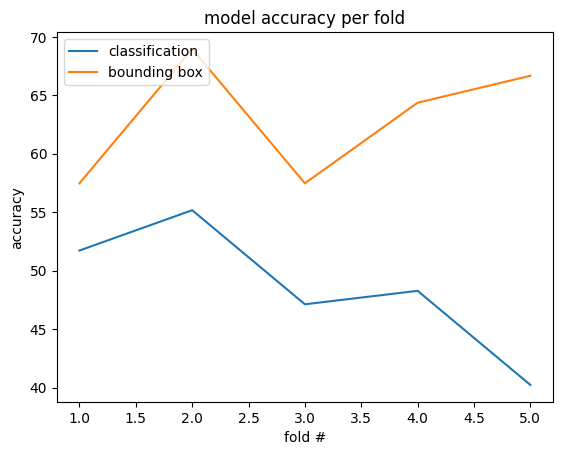

In [19]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(range(1,6),c_acc_per_fold)
plt.plot(range(1,6),bb_acc_per_fold)
plt.title('model accuracy per fold')
plt.ylabel('accuracy')
plt.xlabel('fold #')
plt.legend(['classification', 'bounding box'], loc='upper left')
plt.show()

dict_keys(['loss', 'classification_loss', 'boundingbox_loss', 'classification_accuracy', 'boundingbox_accuracy', 'lr'])


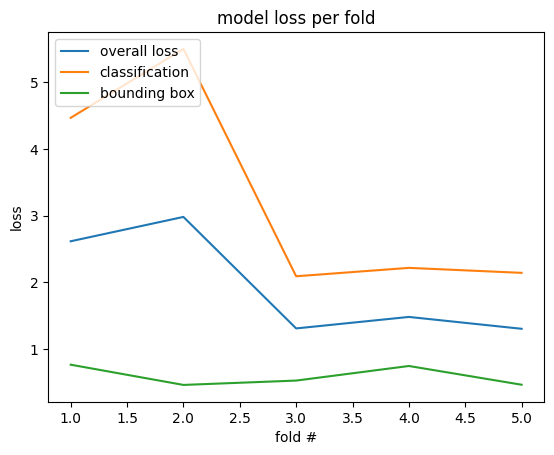

In [18]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(range(1,6),overall_loss_per_fold)
plt.plot(range(1,6),c_loss_per_fold)
plt.plot(range(1,6),bb_loss_per_fold)
plt.title('model loss per fold')
plt.ylabel('loss')
plt.xlabel('fold #')
plt.legend(['overall loss','classification', 'bounding box'], loc='upper left')
plt.show()

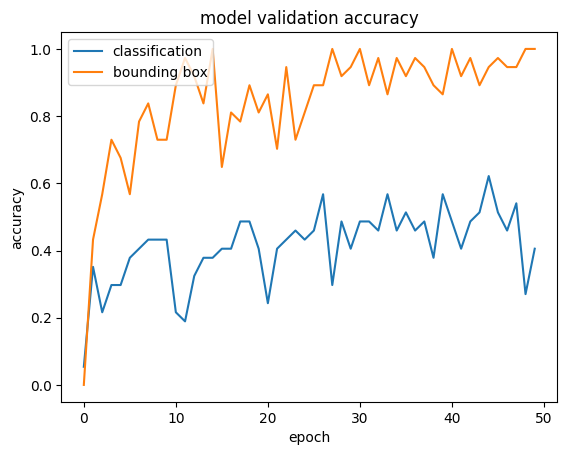

In [24]:
plt.plot(history.history['val_classification_accuracy'])
plt.plot(history.history['val_boundingbox_accuracy'])

plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['classification','bounding box'], loc='upper left')
plt.show()

dict_keys(['loss', 'classification_loss', 'boundingbox_loss', 'classification_accuracy', 'boundingbox_accuracy', 'val_loss', 'val_classification_loss', 'val_boundingbox_loss', 'val_classification_accuracy', 'val_boundingbox_accuracy', 'lr'])


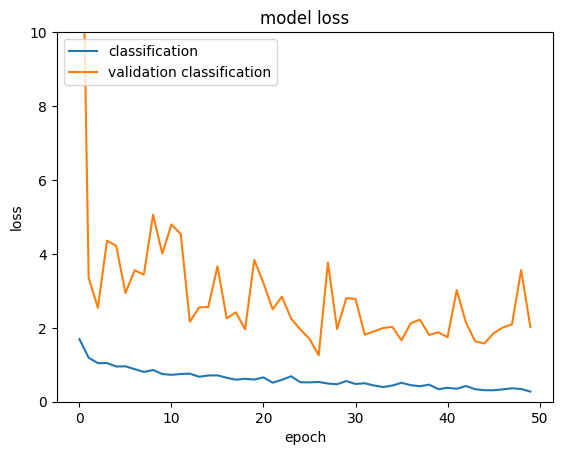

In [25]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['classification_loss'])
plt.plot(history.history['val_classification_loss'])
plt.title('model loss')
plt.ylim(0,10)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['classification', 'validation classification'], loc='upper left')
plt.show()

dict_keys(['loss', 'classification_loss', 'boundingbox_loss', 'classification_accuracy', 'boundingbox_accuracy', 'val_loss', 'val_classification_loss', 'val_boundingbox_loss', 'val_classification_accuracy', 'val_boundingbox_accuracy', 'lr'])


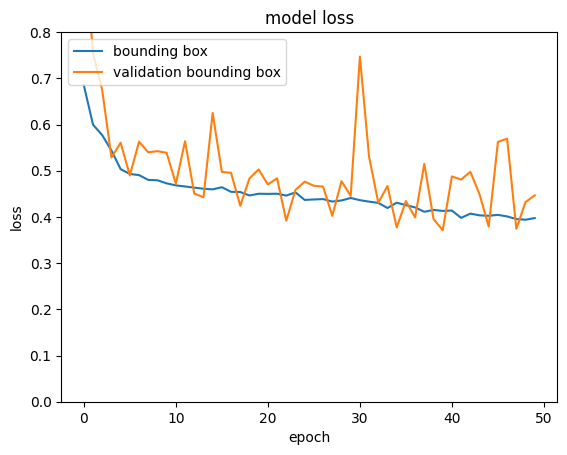

In [26]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['boundingbox_loss'])
plt.plot(history.history['val_boundingbox_loss'])
plt.title('model loss')
plt.ylim(0,0.8)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['bounding box', 'validation bounding box'], loc='upper left')
plt.show()

dict_keys(['loss', 'classification_loss', 'boundingbox_loss', 'classification_accuracy', 'boundingbox_accuracy', 'val_loss', 'val_classification_loss', 'val_boundingbox_loss', 'val_classification_accuracy', 'val_boundingbox_accuracy', 'lr'])


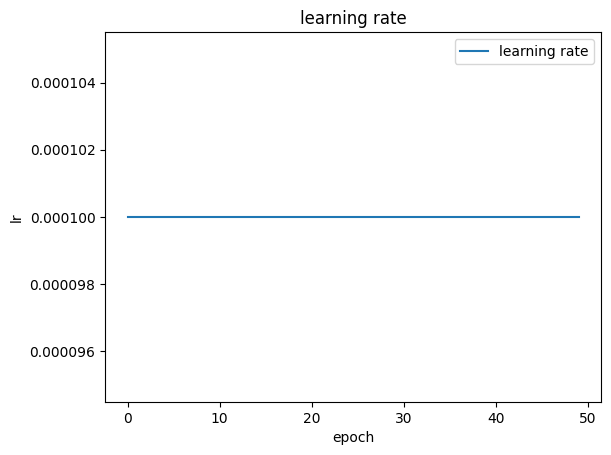

In [27]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['lr'])
plt.title('learning rate')
#plt.ylim(0.000001,0.00001)
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend(['learning rate'], loc='upper right')
plt.show()

In [ ]:
test1 = model.predict(xtest_np_array[248:249])
print(test1)

In [ ]:
test2 = model.predict(xtest_np_array[:1])
print(test2)

In [ ]:
print(test2[0][0])
print(test2[1][0,:4])

In [ ]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
get_iou(test2, ytest_bounding_box[1:4])

In [ ]:
# testimg = xtest_np_array[:1]
# testimg2 = testimg.astype(np.uint8)
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

img = tf.keras.utils.load_img('C:\\Users\\Christopher\\OneDrive\\Desktop\\personal\\CSCI7000_THESIS_DOCS\\THESIS_IMAGE_DET_MODEL_START_HERE\\COMBINEDNEGPOSIMAGES\\test15\\outputready2.jpg')
plot_image(img) # loads the image
